<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:92: SyntaxWarning: invalid escape sequence '\m'
<>:95: SyntaxWarning: invalid escape sequence '\m'
<>:89: SyntaxWarning: invalid escape sequence '\m'
<>:92: SyntaxWarning: invalid escape sequence '\m'
<>:95: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_46026/2473157163.py:89: SyntaxWarning: invalid escape sequence '\m'
  ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Label the adjusted Fermi energy line
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_46026/2473157163.py:92: SyntaxWarning: invalid escape sequence '\m'
  ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Label the adjusted Fermi energy line
/var/folders/4d/rzxz26xj0z5b8wy1gj

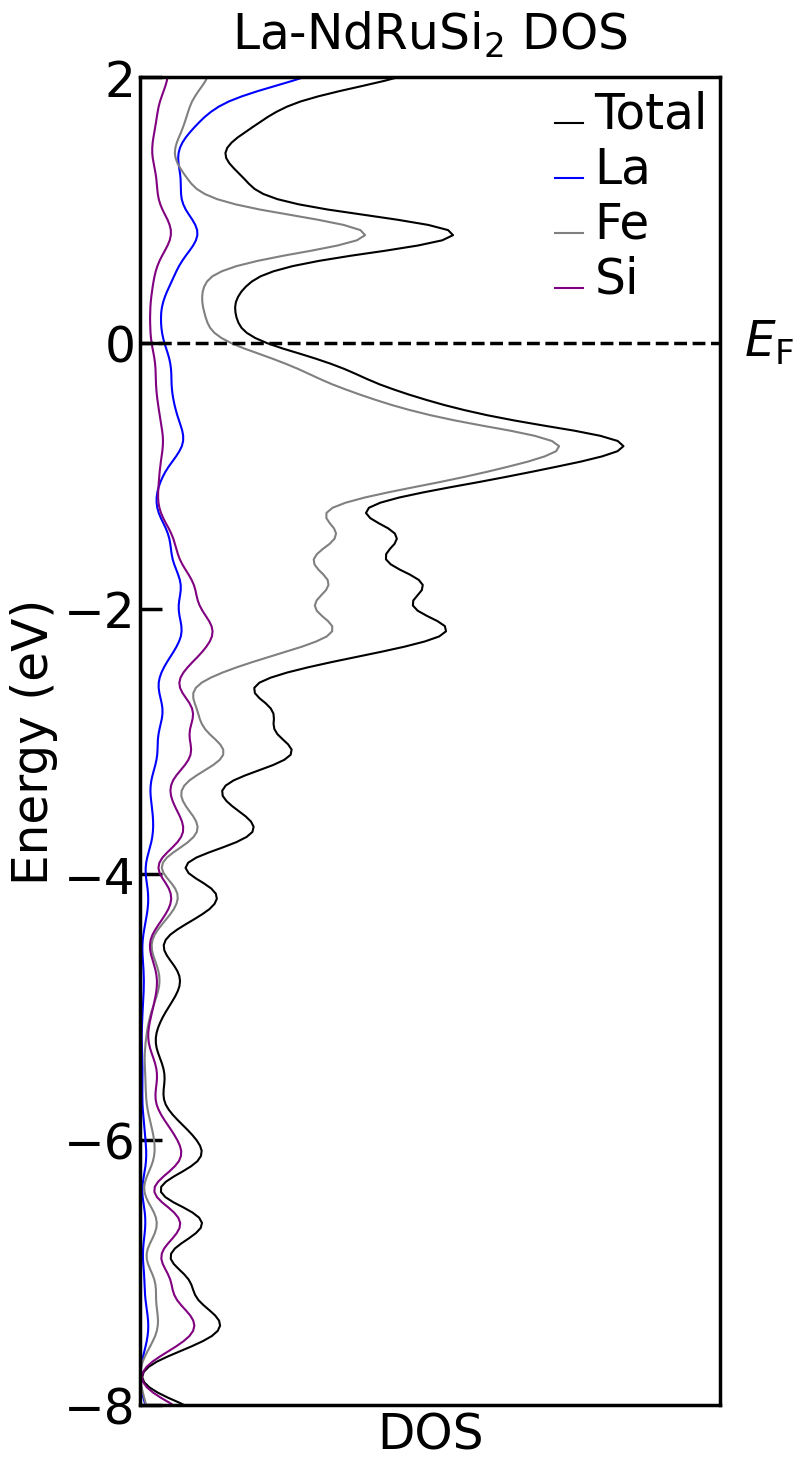

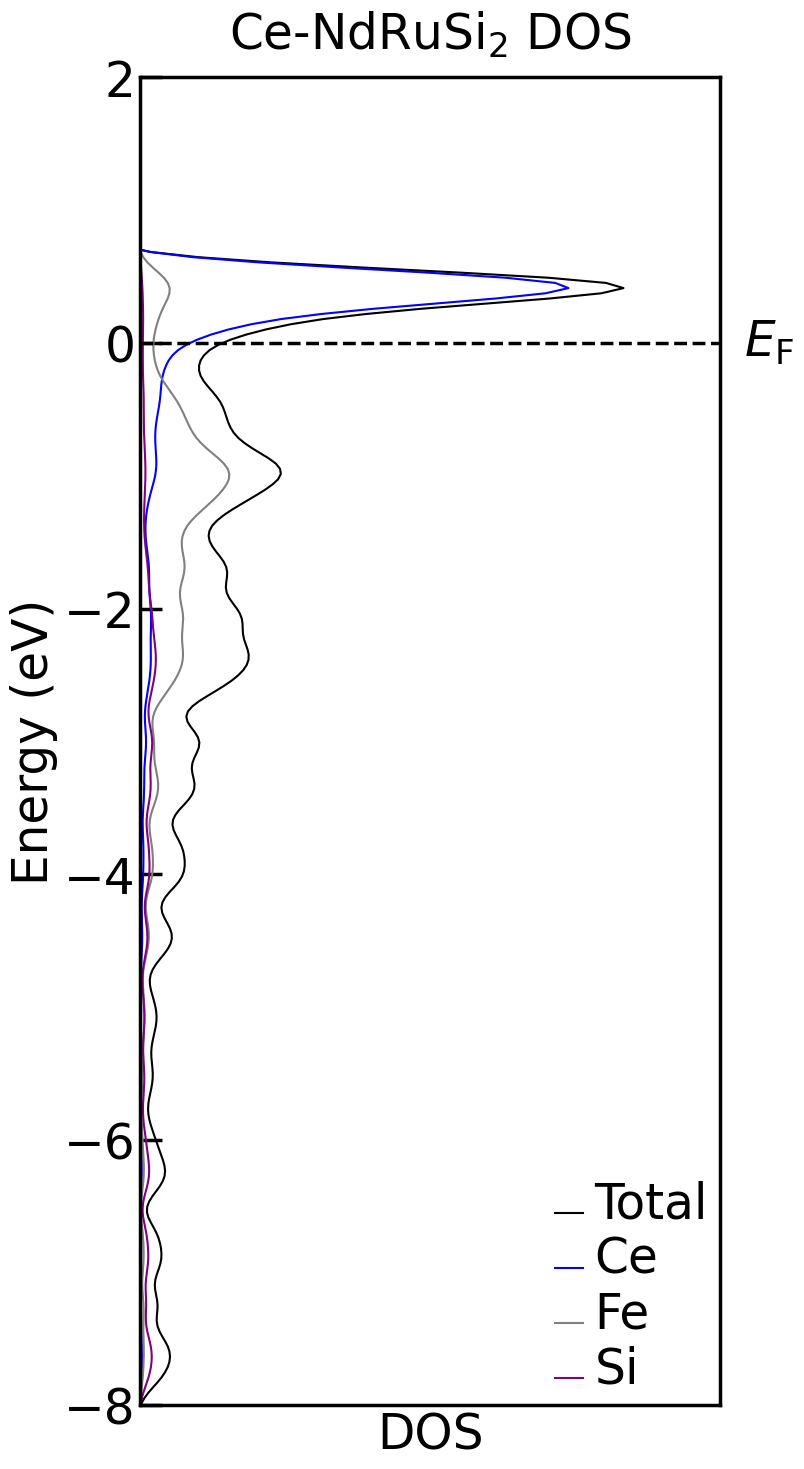

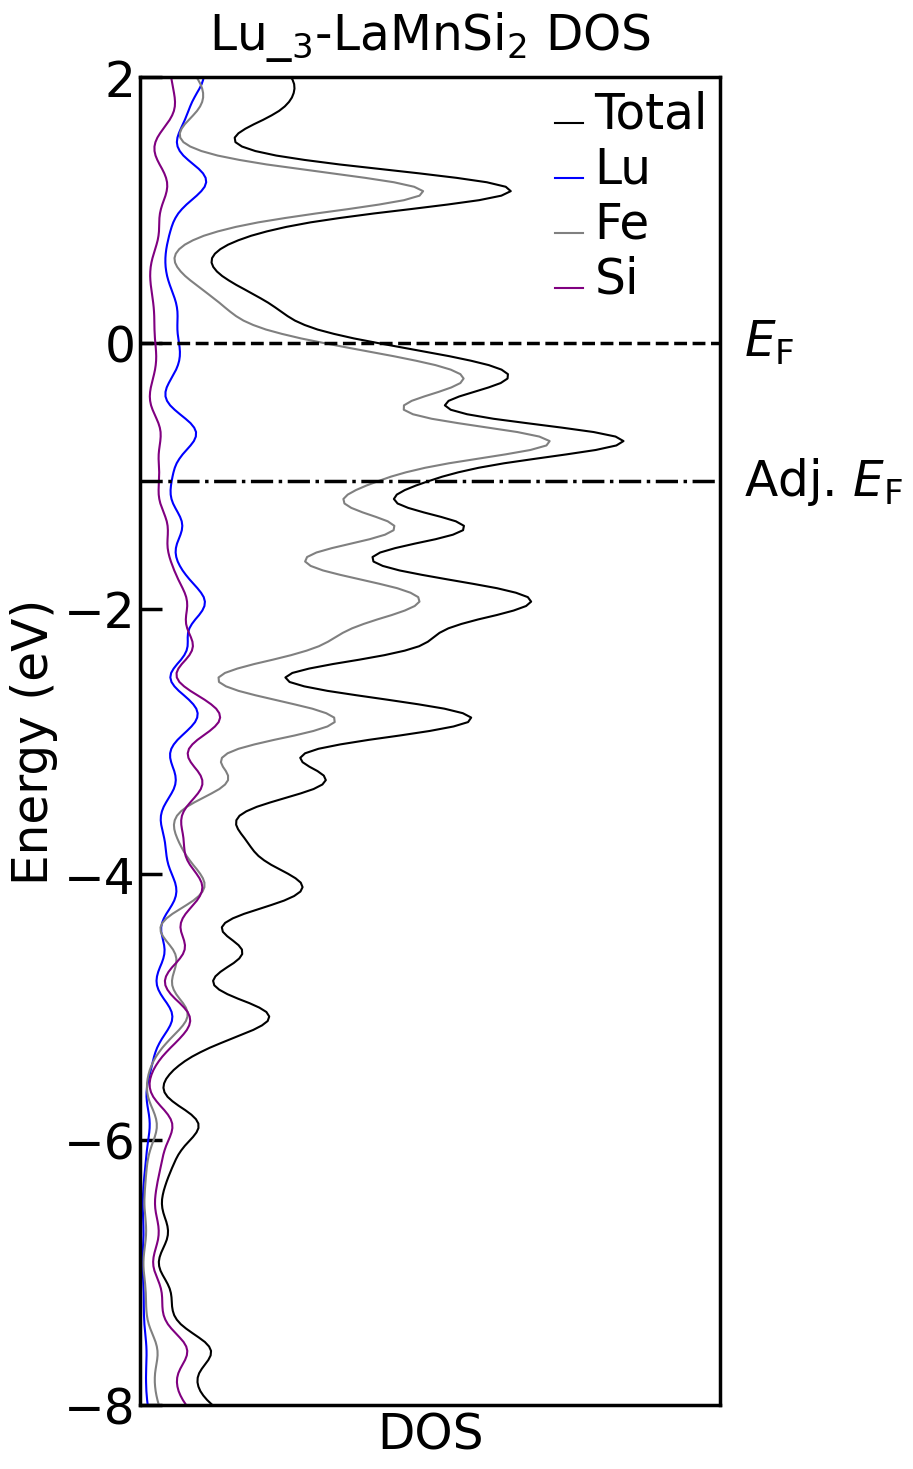

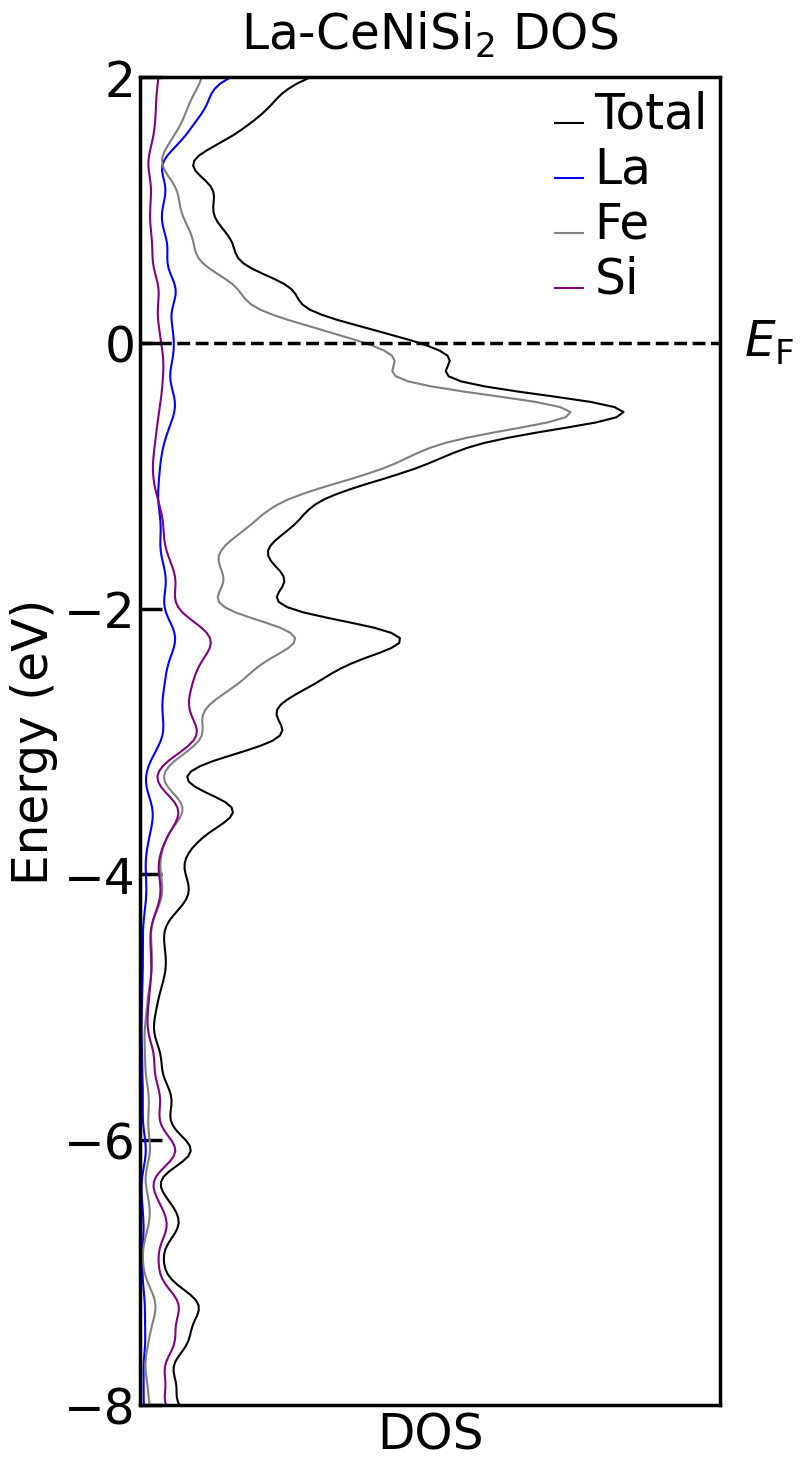

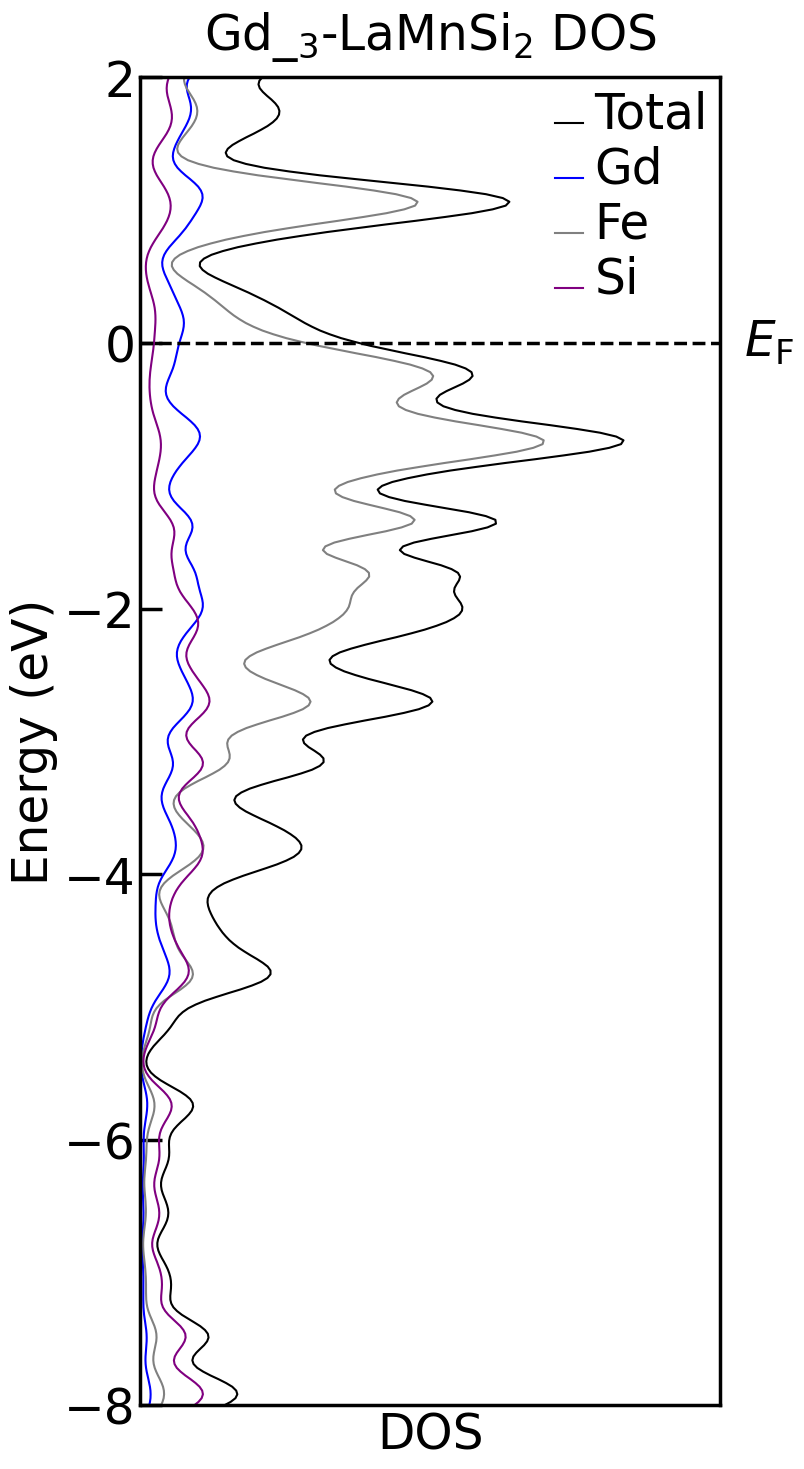

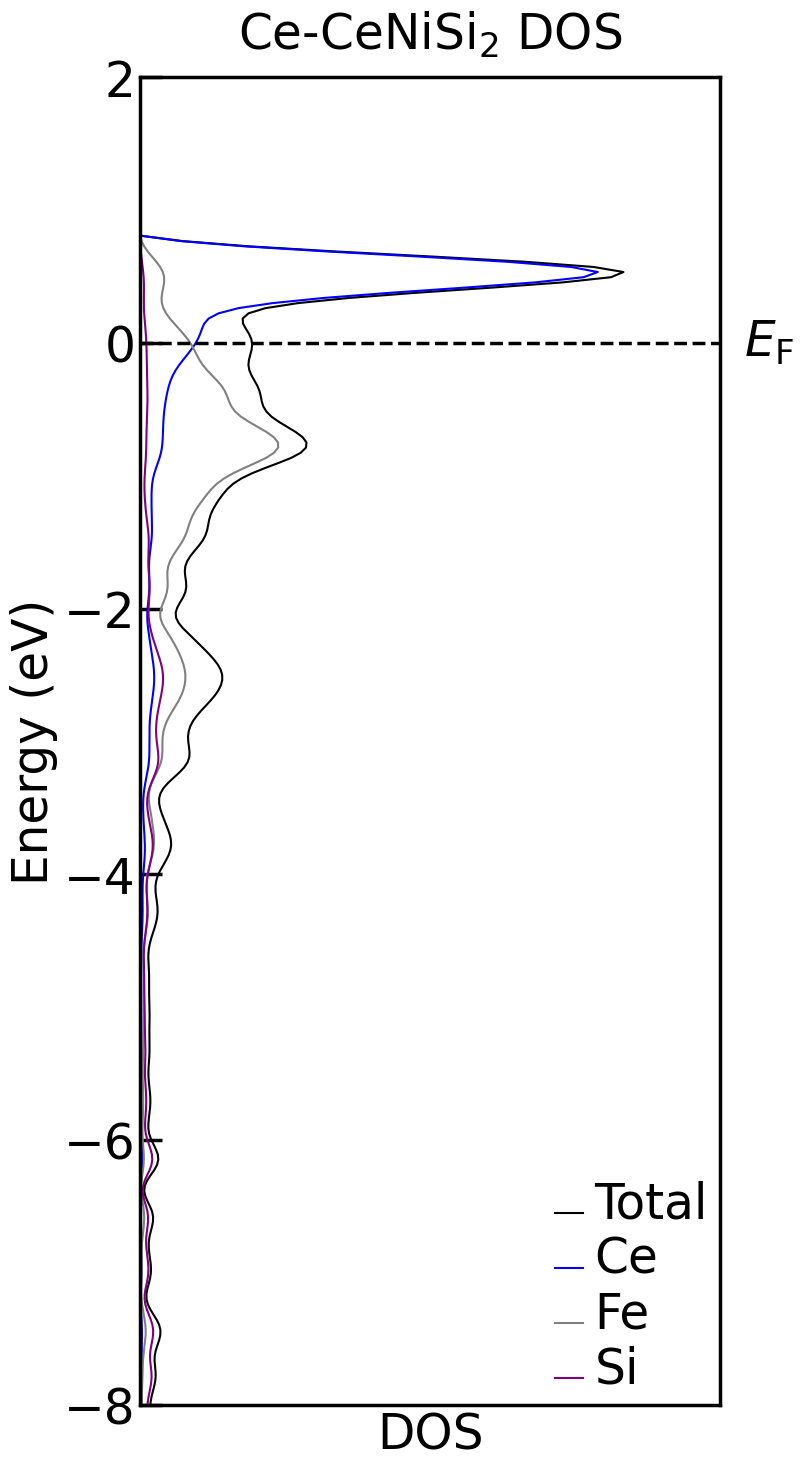

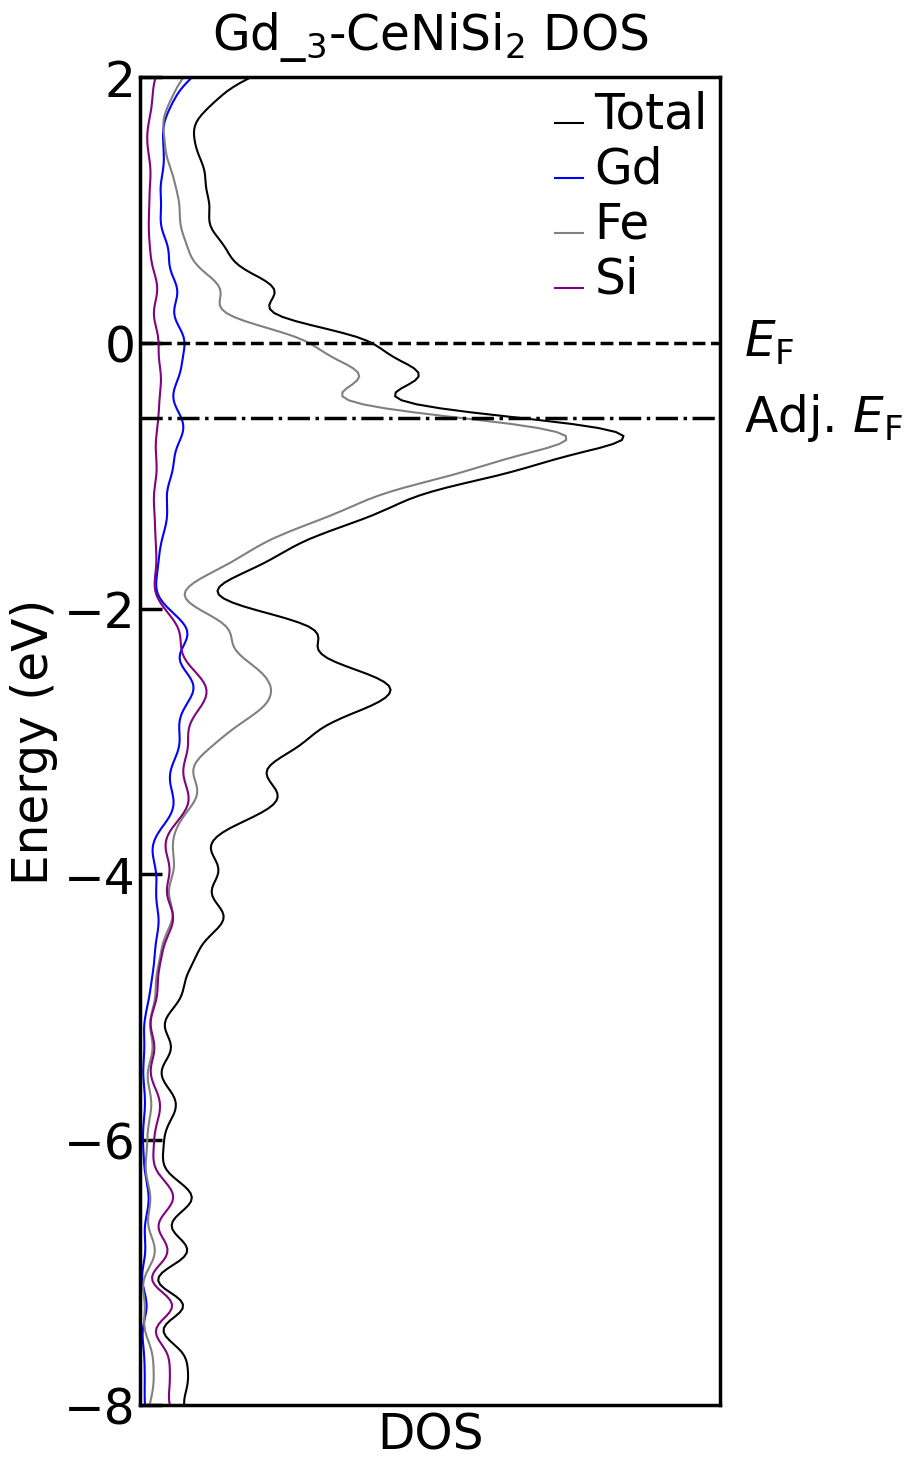

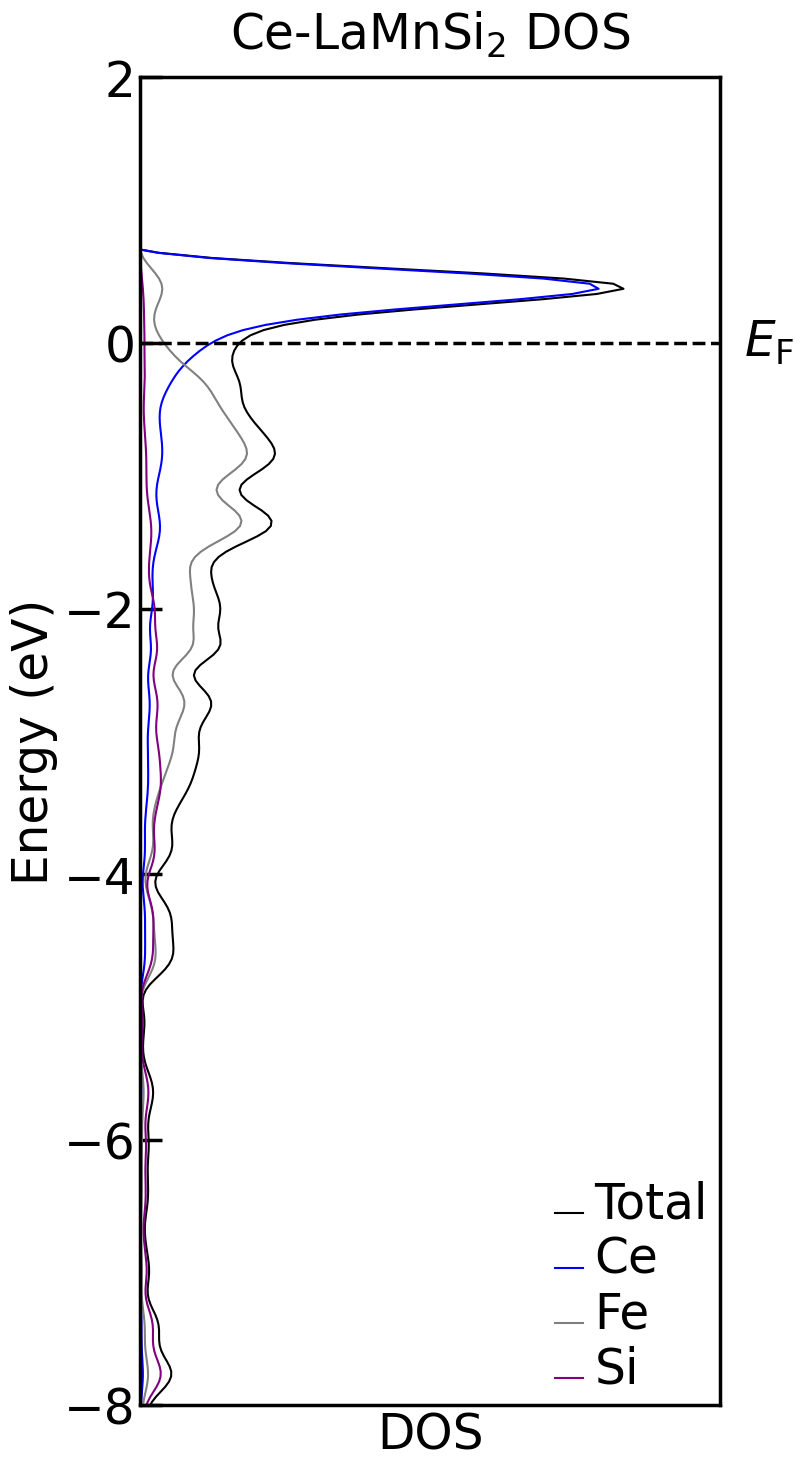

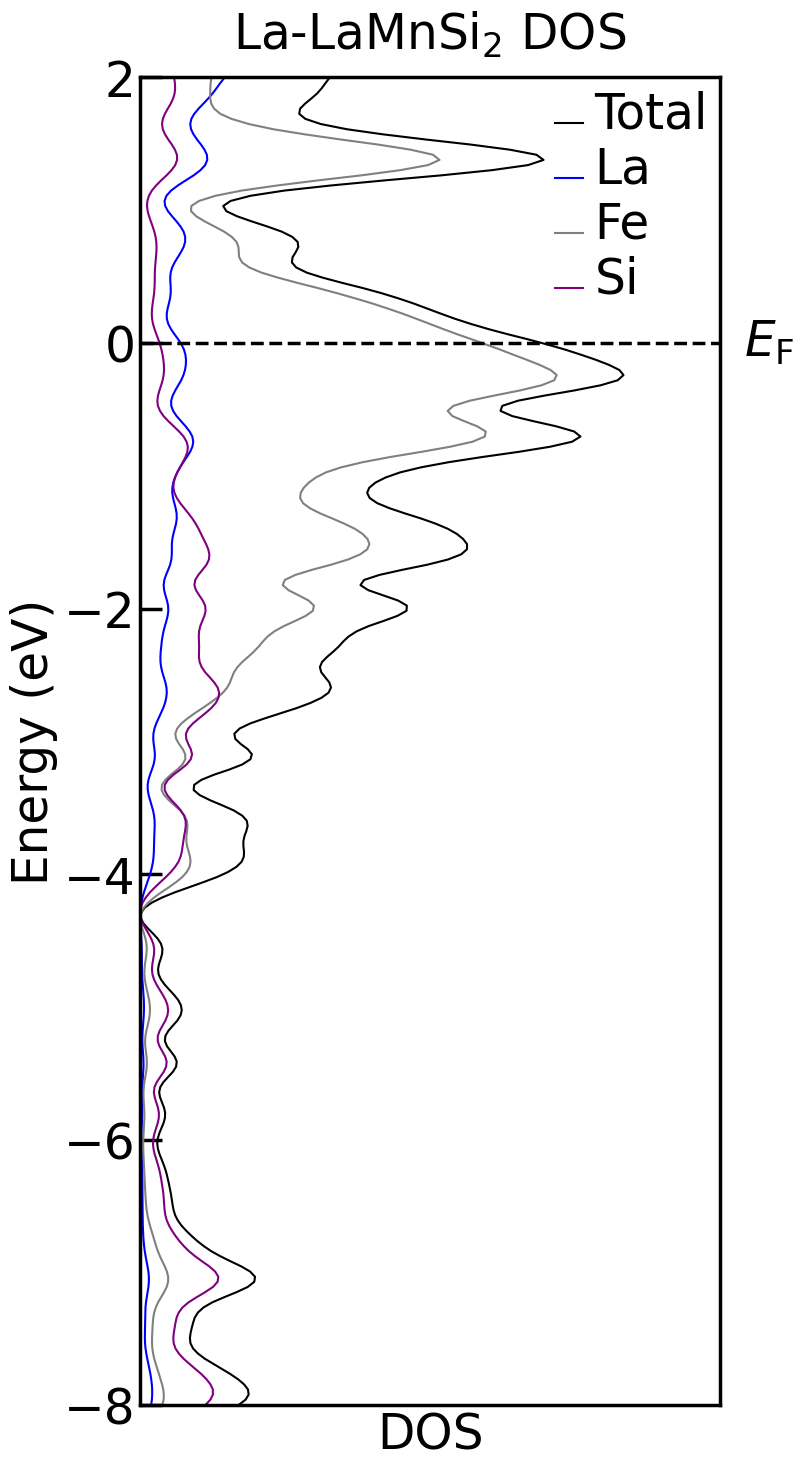

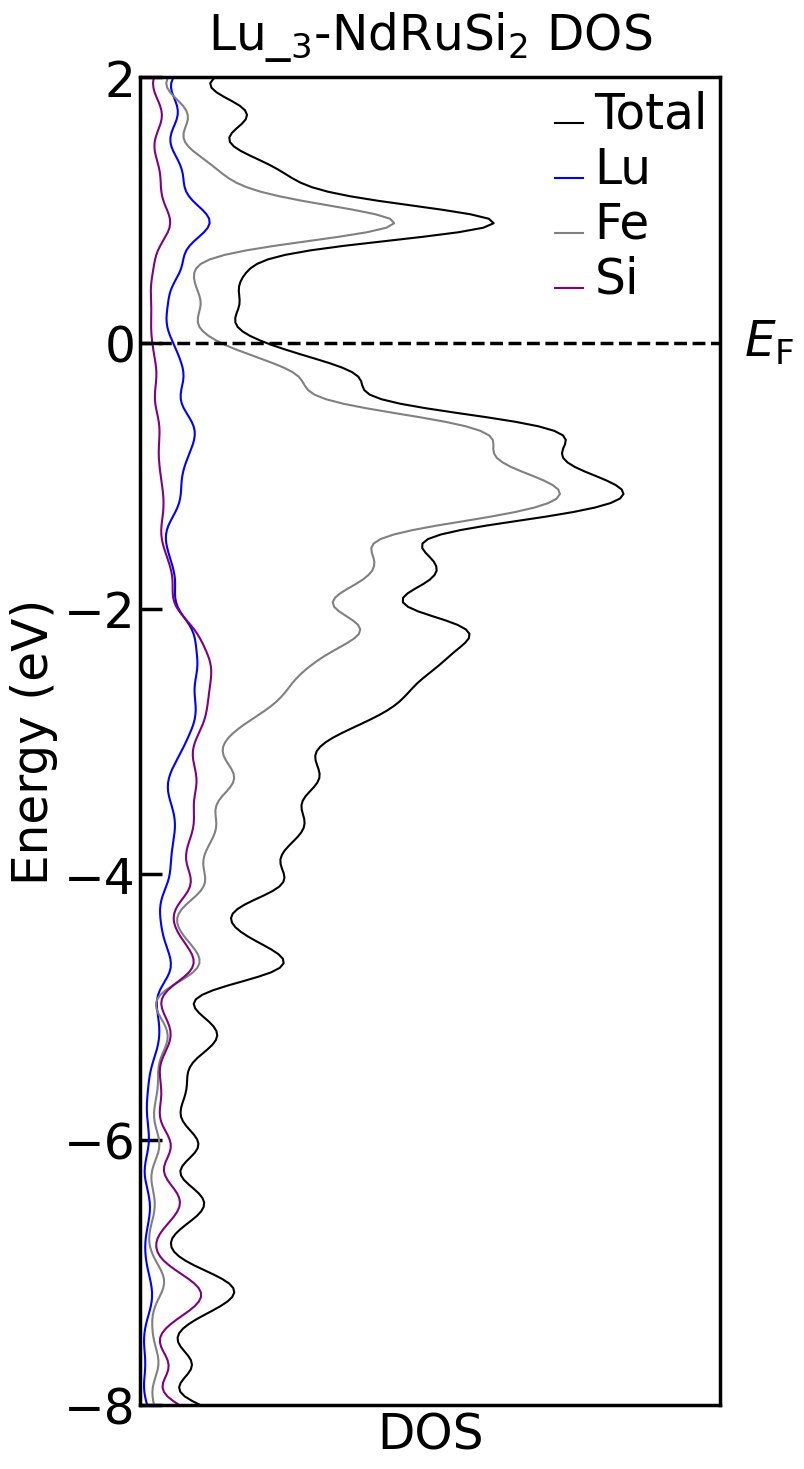

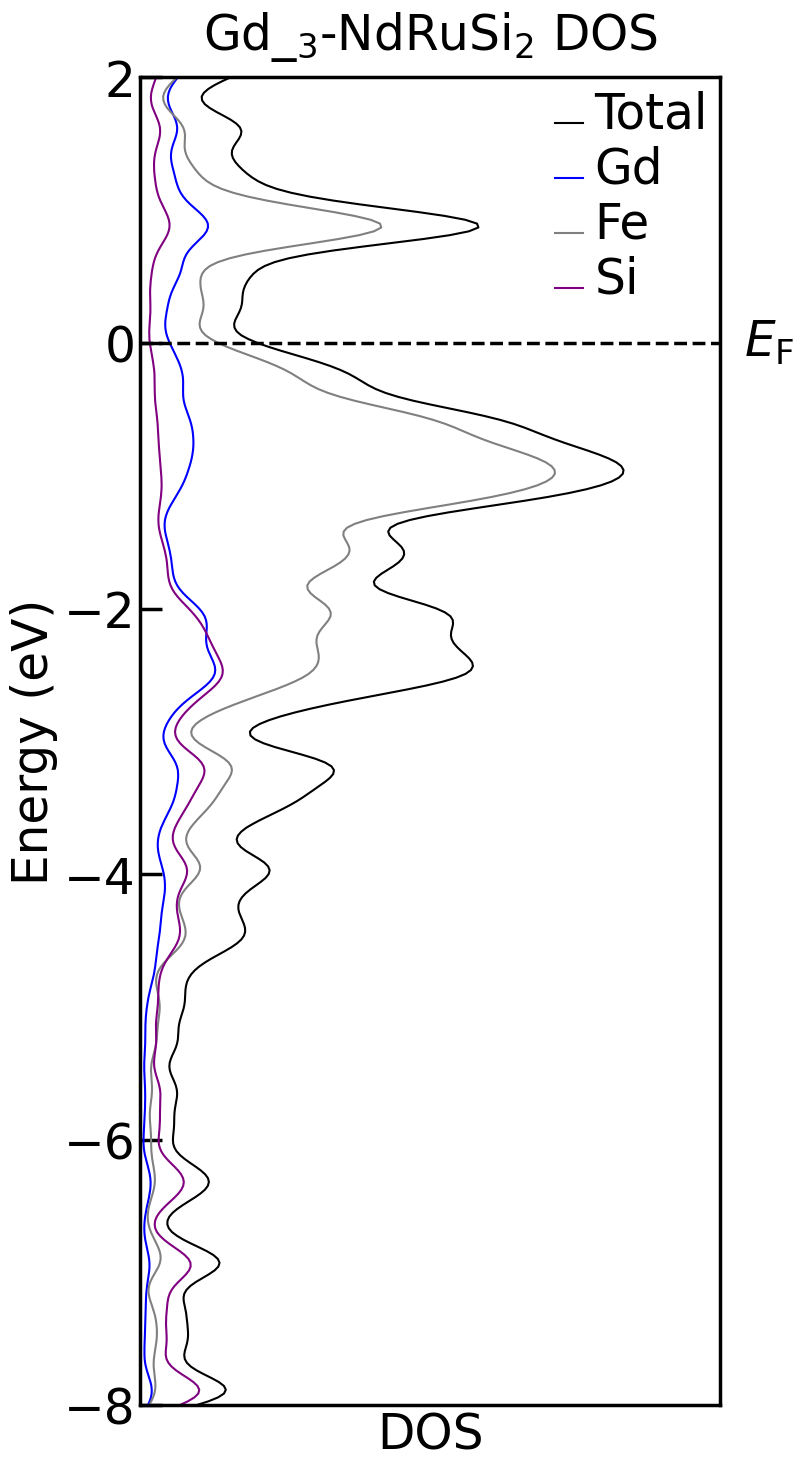

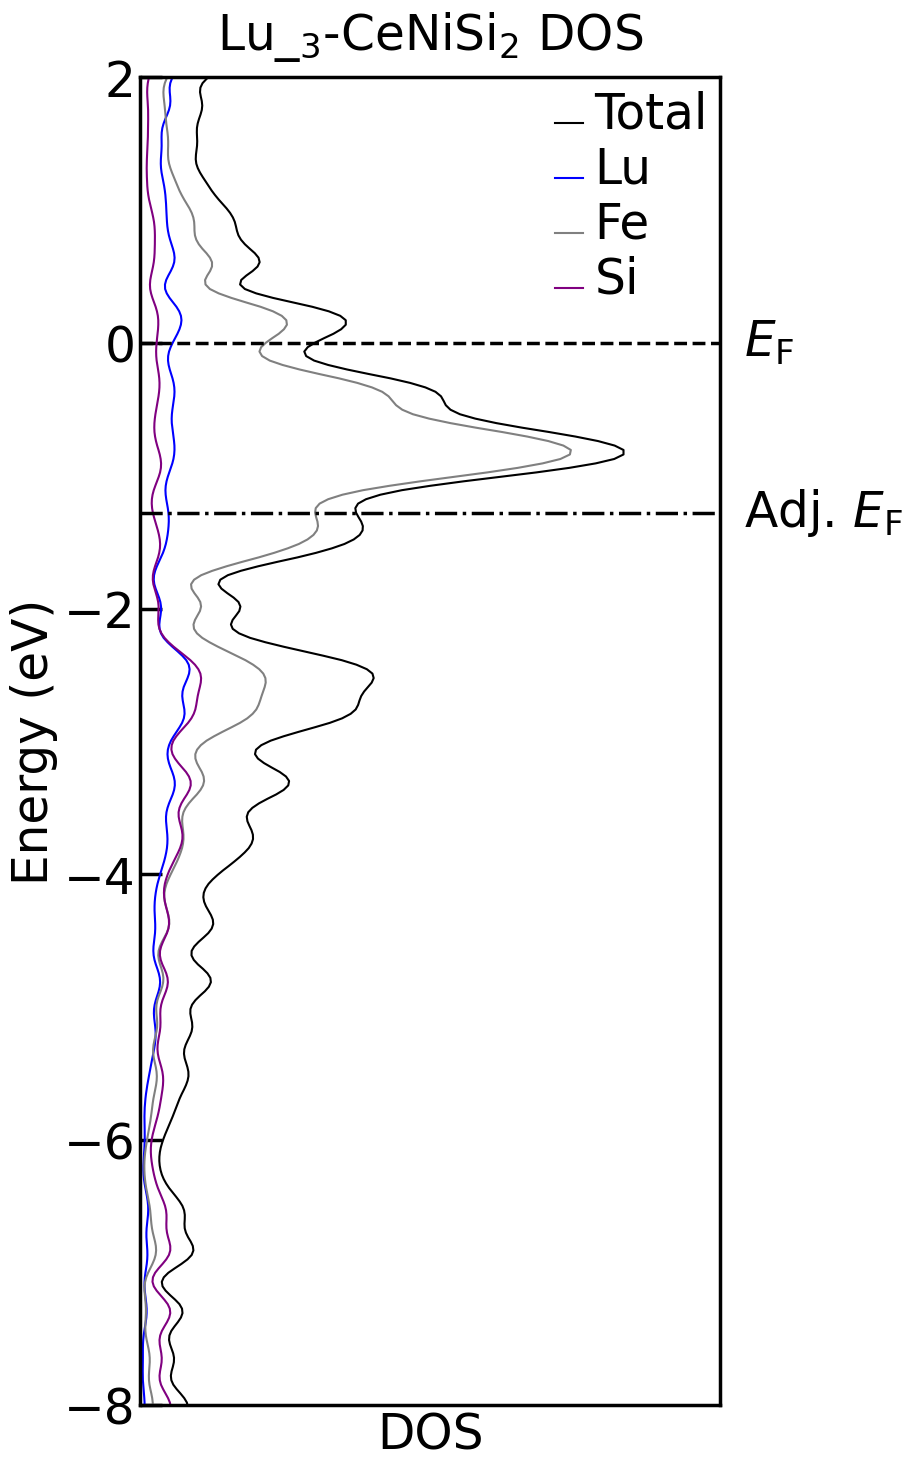

In [293]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import glob
import re

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725,
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_Dos_contributions(directory):
    Dos_files = get_Dos_files(directory)
    fig, ax = plt.subplots(figsize=(10, 16))  # Adjusted figure size
    
    max_x_value_within_y_frame = 0  # Initialize max x-value within y-frame

    plt.subplots_adjust(left=.22, top=.94, right=.8)  # Increase left margin
    
    for i, filename in enumerate(Dos_files):
        # Check if filename contains 'Int'
        if 'Dos-Int' in filename:
            continue  # Skip plotting if filename contains 'Int'

        # Read data from file
        data = np.loadtxt(filename)
        
        # Split x and y values
        x = data[:, 0]
        y = data[:, 1]
        
        # Get file name without extension
        file_name = os.path.splitext(os.path.basename(filename))[0]
        
        # Get parent folder label
        parent_folder = os.path.basename(directory)
        
        # Subtract corresponding value from y-values
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]
        
        # Plot the data
        label = file_name.replace('Dos-', '')  # Remove 'Dos-' prefix from label
        
        # Assign colors based on element
        color = 'blue'  # Default color for most elements
        if 'Total' in label:
            color = 'black'  # Total DOS in black
        elif label in ["Fe"]:
            color = 'grey'  # Iron DOS in grey
        elif label in ["Si"]:
            color = 'purple'  # Silicon DOS in purple
        
        ax.plot(x, y, label=label, color=color)
        
        # Update max x-value within y-frame
        x_filtered = x[(y >= -8) & (y <= 2)]
        if x_filtered.size > 0:
            max_x_value_within_y_frame = max(max_x_value_within_y_frame, max(x_filtered))

    # Use regular expression to find numbers and subscript them
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    folder_name_subscripted = folder_name_subscripted.replace('DOS', 'Dos')  # Replace "DOS" with "Dos"
    
    ax.set_xlabel('DOS', fontsize=35)  # Set font size for x-axis label
    ax.set_ylabel('Energy (eV)', fontsize=35)  # Set font size for y-axis label
    ax.set_title(folder_name_subscripted + ' DOS', fontsize=35, pad=20)  # Set font size for title and add padding
    
    # Set x-axis limits based on max value within y-frame
    ax.set_xlim(0, max_x_value_within_y_frame * 1.2)
    ax.set_ylim(-8, 2)  # Set the y-axis limits

    # Additional conditions for horizontal lines - Adj. EF
    if parent_folder == "Gd_3-CeNiSi2":
        ax.axhline(-0.5645858, color='black', linestyle='-.', linewidth=2.5)  # Set line width to 2.5 for dashed line
        ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Label the adjusted Fermi energy line
    elif parent_folder == "Lu_3-LaMnSi2":
        ax.axhline(-1.0402164, color='black', linestyle='-.', linewidth=2.5)  # Set line width to 2.5 for dashed line
        ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Label the adjusted Fermi energy line
    elif parent_folder == "Lu_3-CeNiSi2":
        ax.axhline(-1.2770532, color='black', linestyle='-.', linewidth=2.5)  # Set line width to 2.5 for dashed line
        ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, -1.2770532, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Label the adjusted Fermi energy line

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))  # Show only whole numbers on x-axis
    ax.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Set line width to 2.5 for dashed line
    ax.text(max_x_value_within_y_frame + 0.25 * max_x_value_within_y_frame, 0, r'$E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Set font size for annotation text and italicize 'E'

    # Set font size for legend
    legend = ax.legend(frameon=False)  # Remove legend frame
    for text in legend.get_texts():
        text.set_fontsize(35)

    # Customize y-axis tick marks
    ax.tick_params(axis='y', direction='in', length=16, width=2.5, colors='black', which='both', labelsize=35)  # Set font size for tick labels and thicker ticks

    # Remove x-axis tick marks and labels
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

    # Set axes lines width to 2.5
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/Element_Contributions/TDOS', folder_name + ".png")
    fig.savefig(output_filename)

def get_Dos_files(directory):
    # Use glob to find all files starting with "Dos-" in the specified directory
    Dos_files = glob.glob(os.path.join(directory, 'Dos-*'))
    # Filter out files containing '+'
    Dos_files.sort(key=lambda x: custom_order(os.path.basename(x)))
    return Dos_files

def custom_order(filename):
    # Define the custom order of Total, {RE: "Er", "Ce", "Eu", "Ho", "Pr", "Sm", "Dy", "Gd", "La", "Nd", "Tb", "Lu"}, Fe, and Si
    order = {"Total": 0, "Er": 1, "Ce": 1, "Eu": 1, "Ho": 1, "Pr": 1, "Sm": 1, "Dy": 1, "Gd": 1, "La": 1, "Nd": 1, "Tb": 1, "Lu": 1, "Fe": 2, "Si": 3}
    # Extract the label from the filename
    label = filename.replace('Dos-', '').split('_')[0]
    # Return the corresponding order value
    return order.get(label, 999)

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2")

    for folder in os.listdir(structures_directory):
        directory = os.path.join(structures_directory, folder)
        if os.path.isdir(directory) and folder != 'Graphs':
            plot_Dos_contributions(directory)


<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:113: SyntaxWarning: invalid escape sequence '\m'
<>:103: SyntaxWarning: invalid escape sequence '\m'
<>:108: SyntaxWarning: invalid escape sequence '\m'
<>:113: SyntaxWarning: invalid escape sequence '\m'
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74107/1190286456.py:103: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black',
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74107/1190286456.py:108: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black',
/var/folders/4d/rzxz26xj0z5b8wy1gj72mcz80000gn/T/ipykernel_74107/1190286456.py:113: SyntaxWarning: invalid escape sequence '\m'
  ax.text(1.01, -1.2770532, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', colo

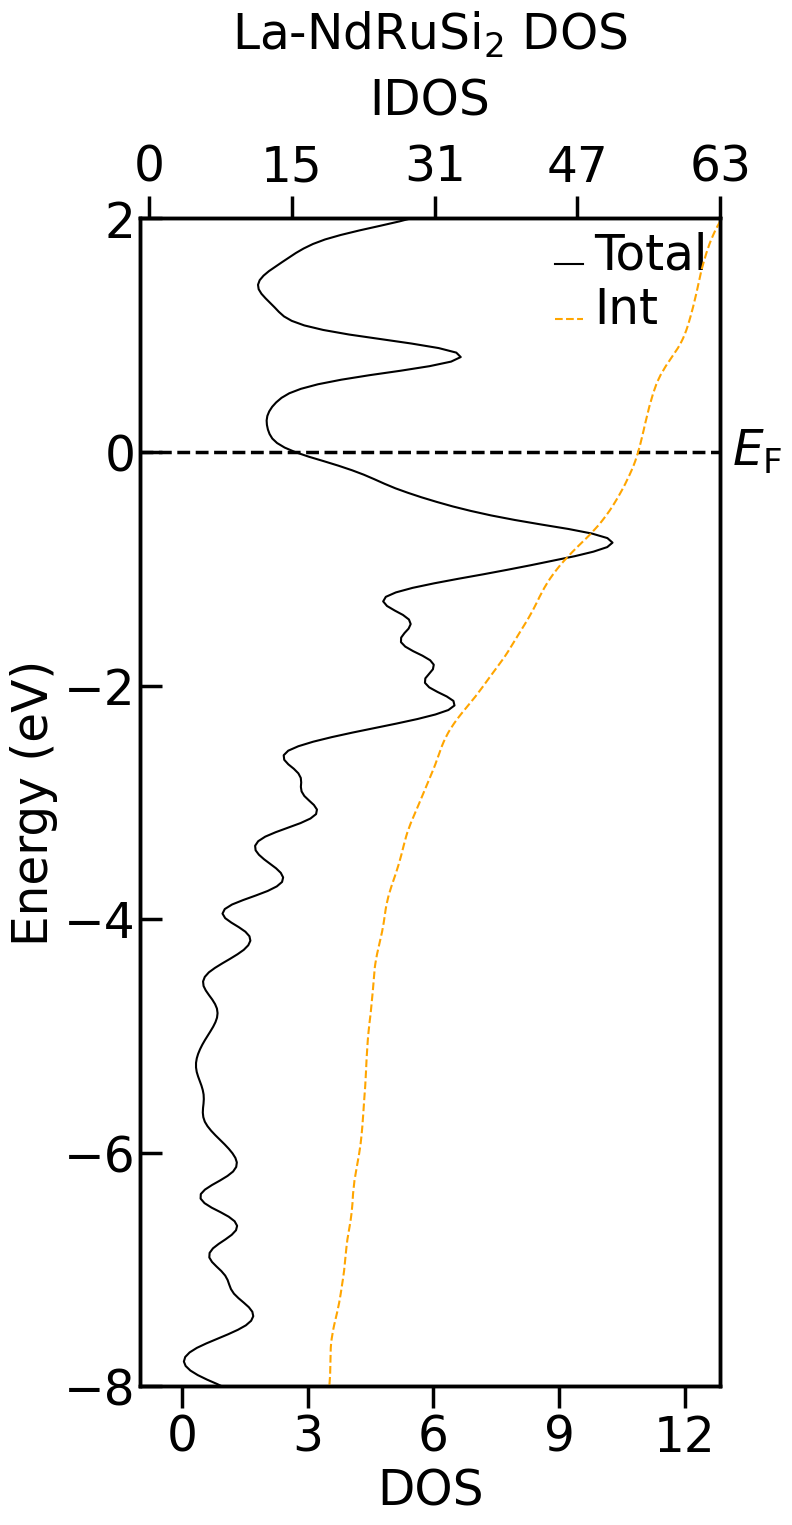

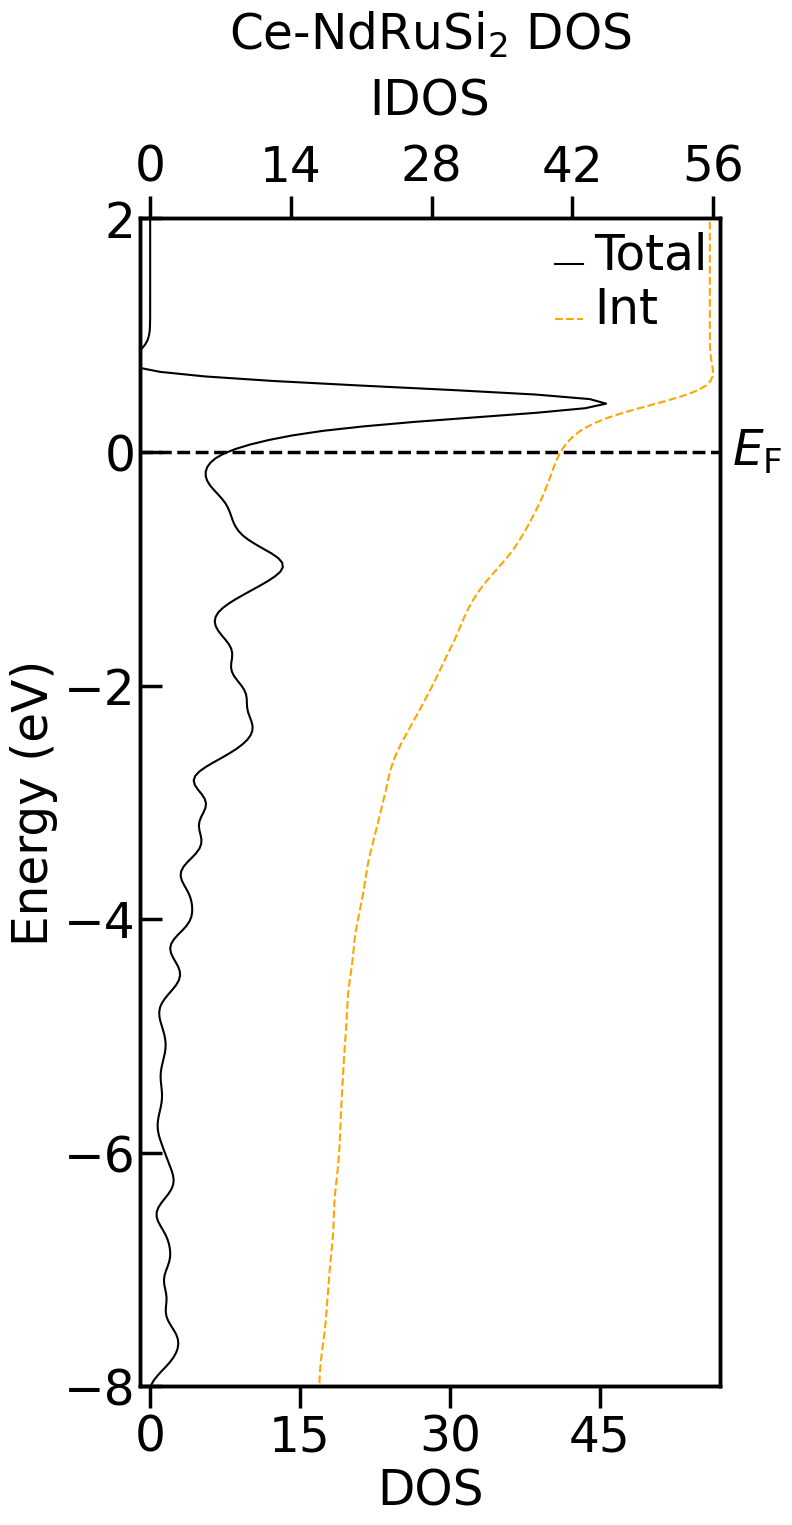

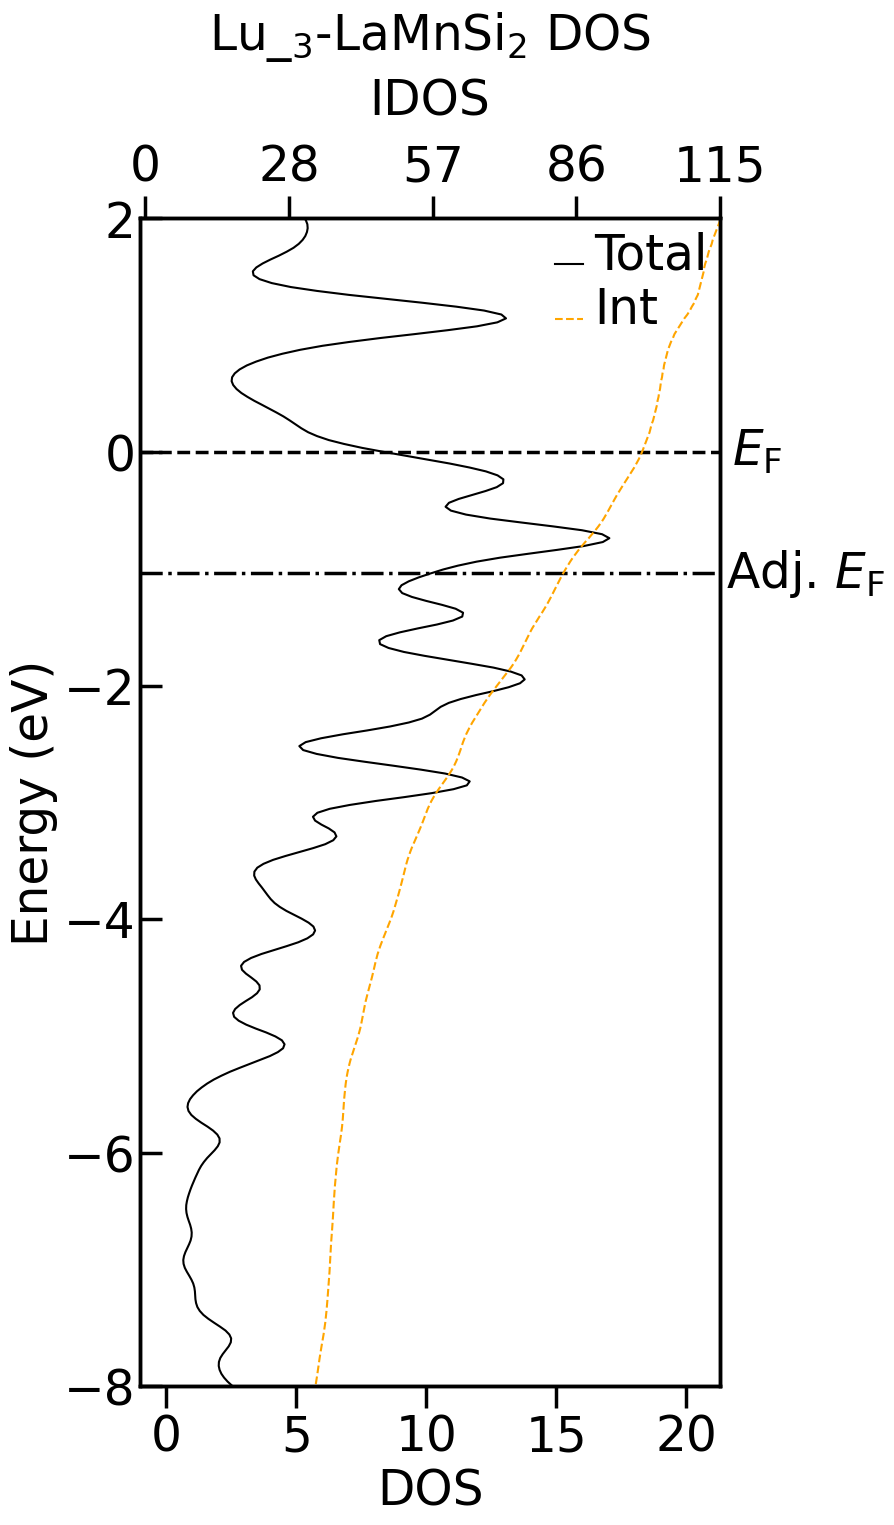

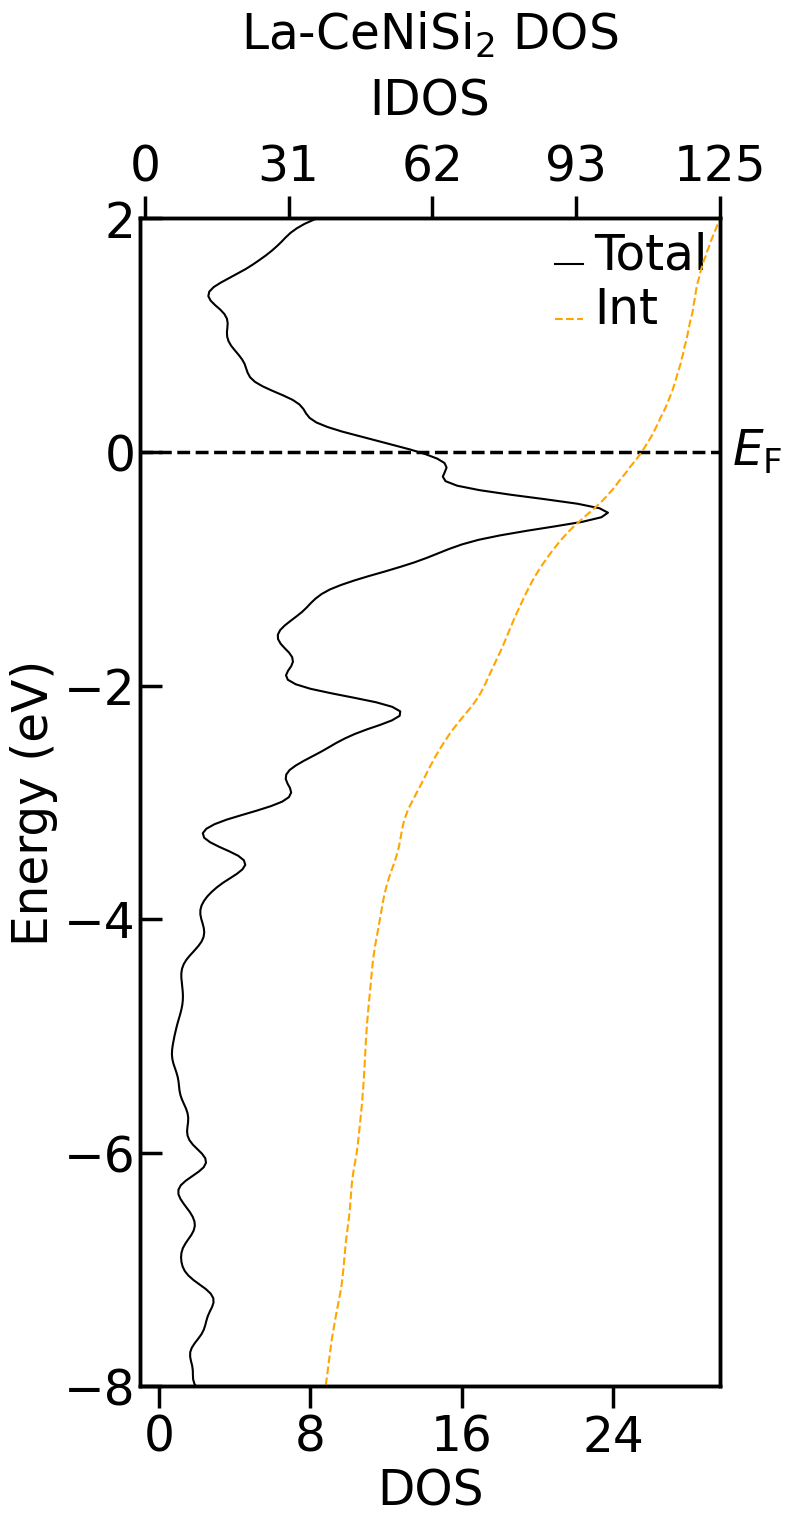

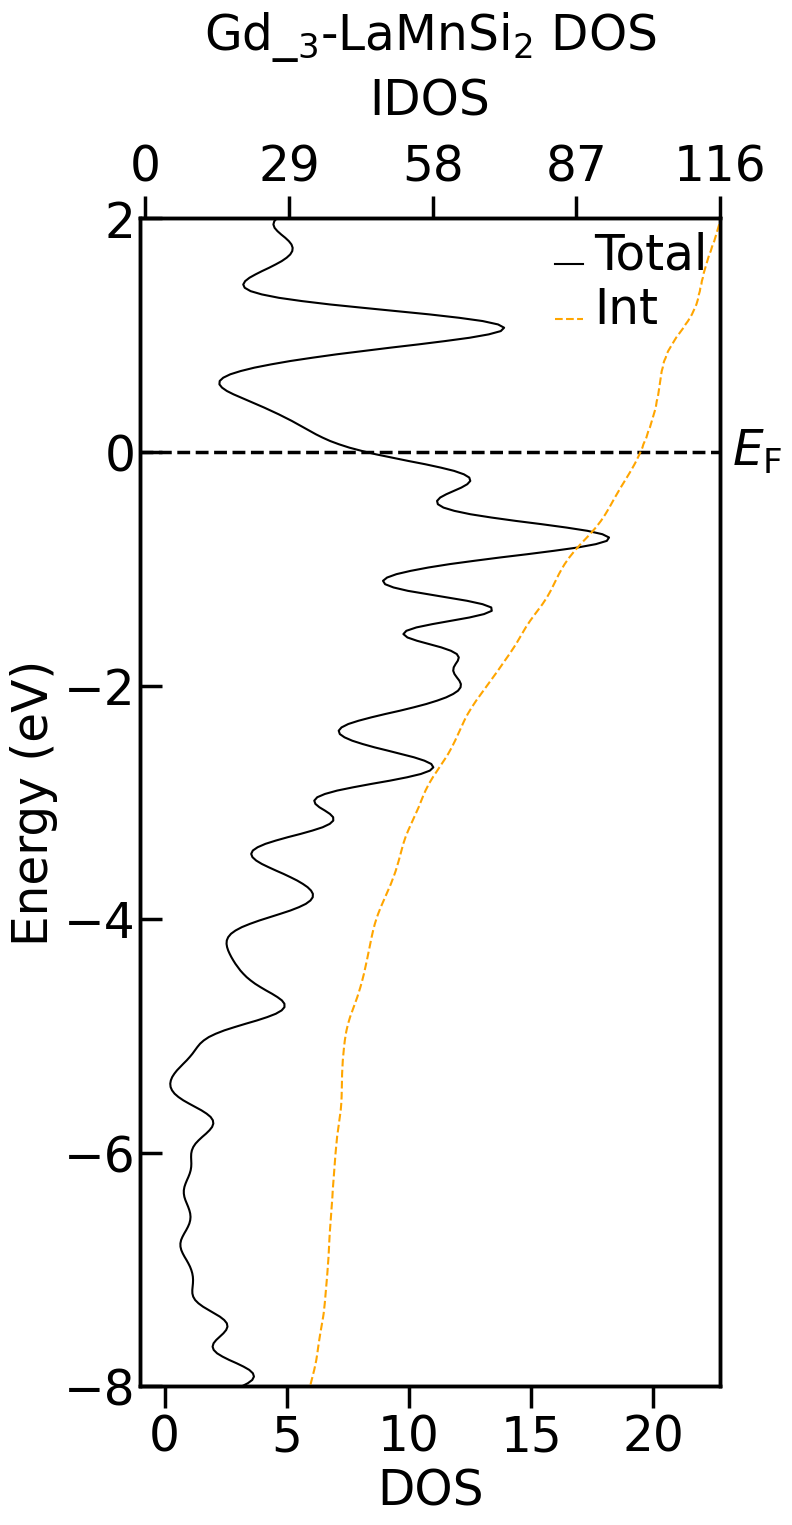

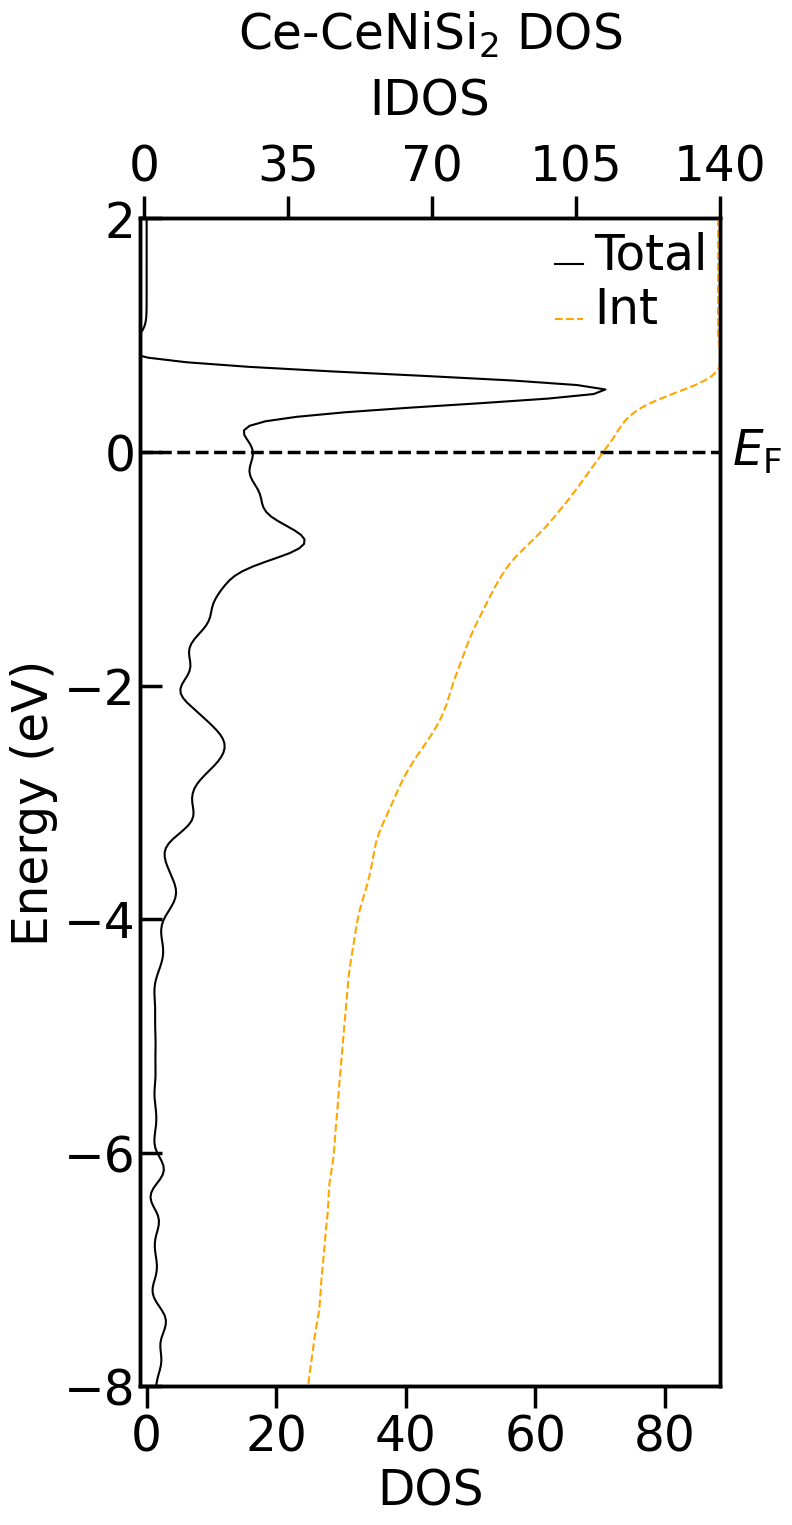

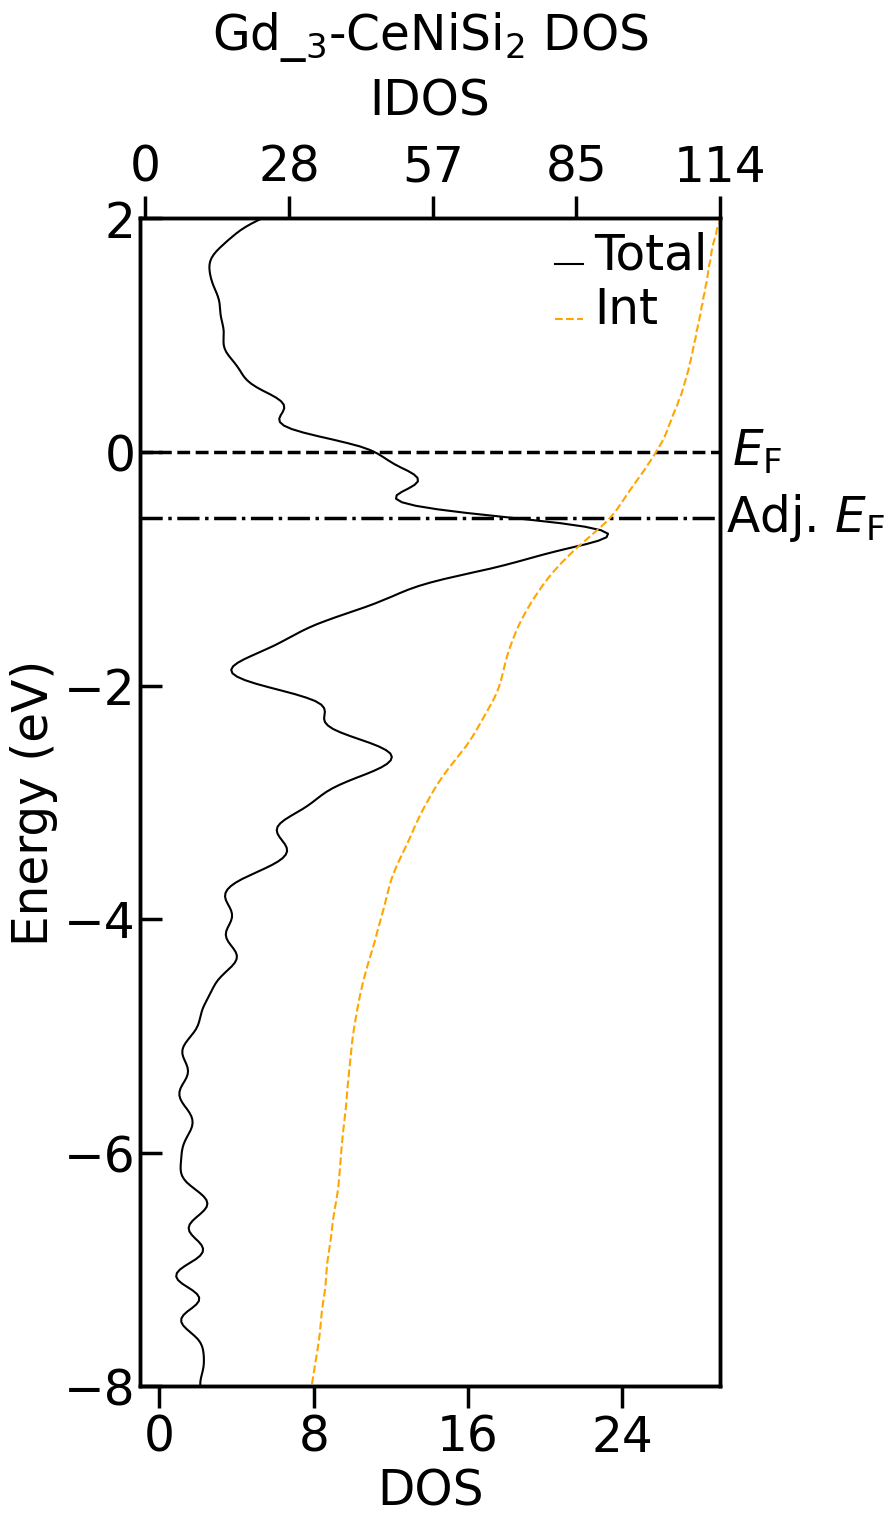

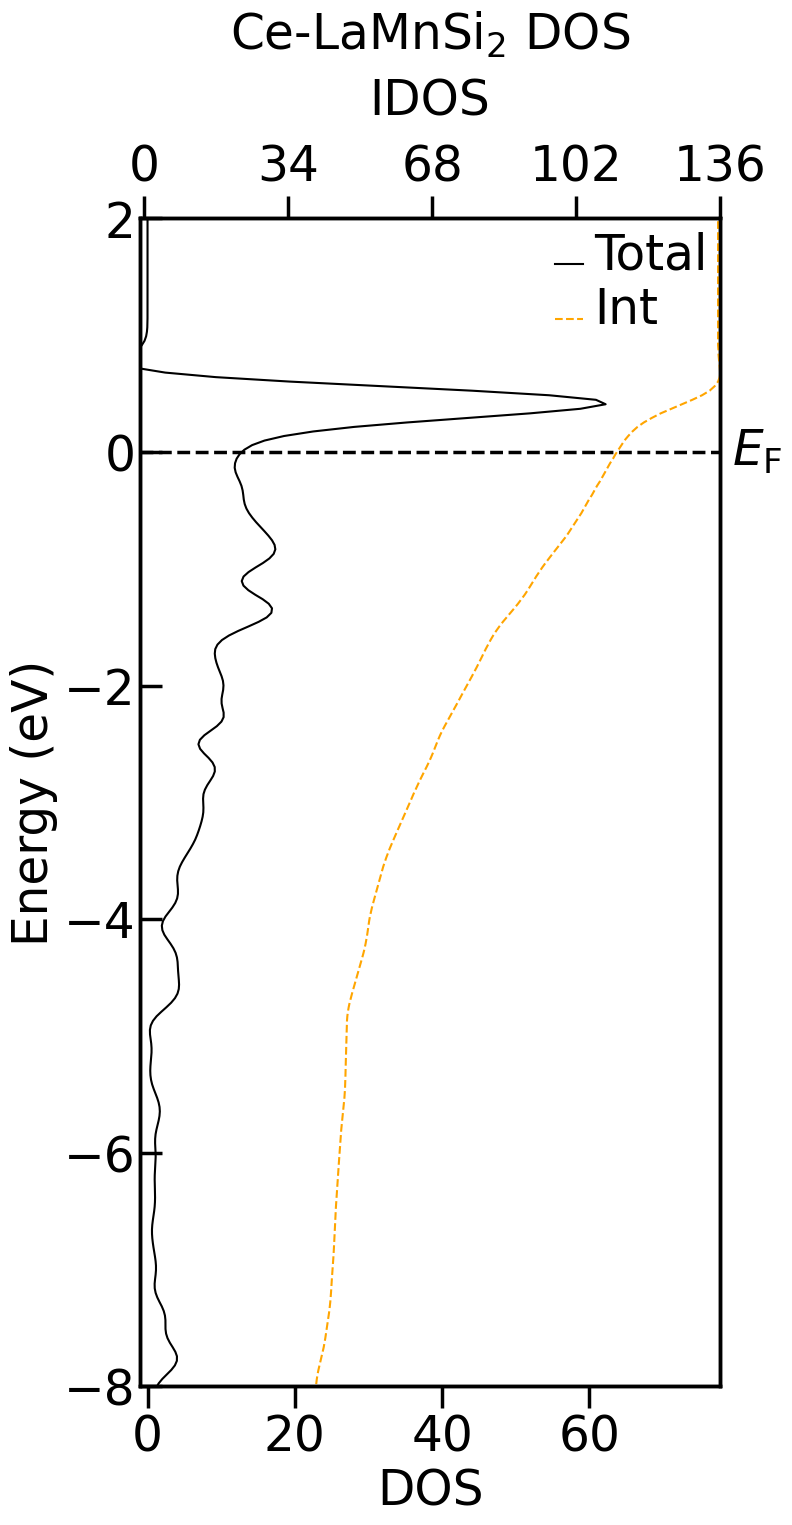

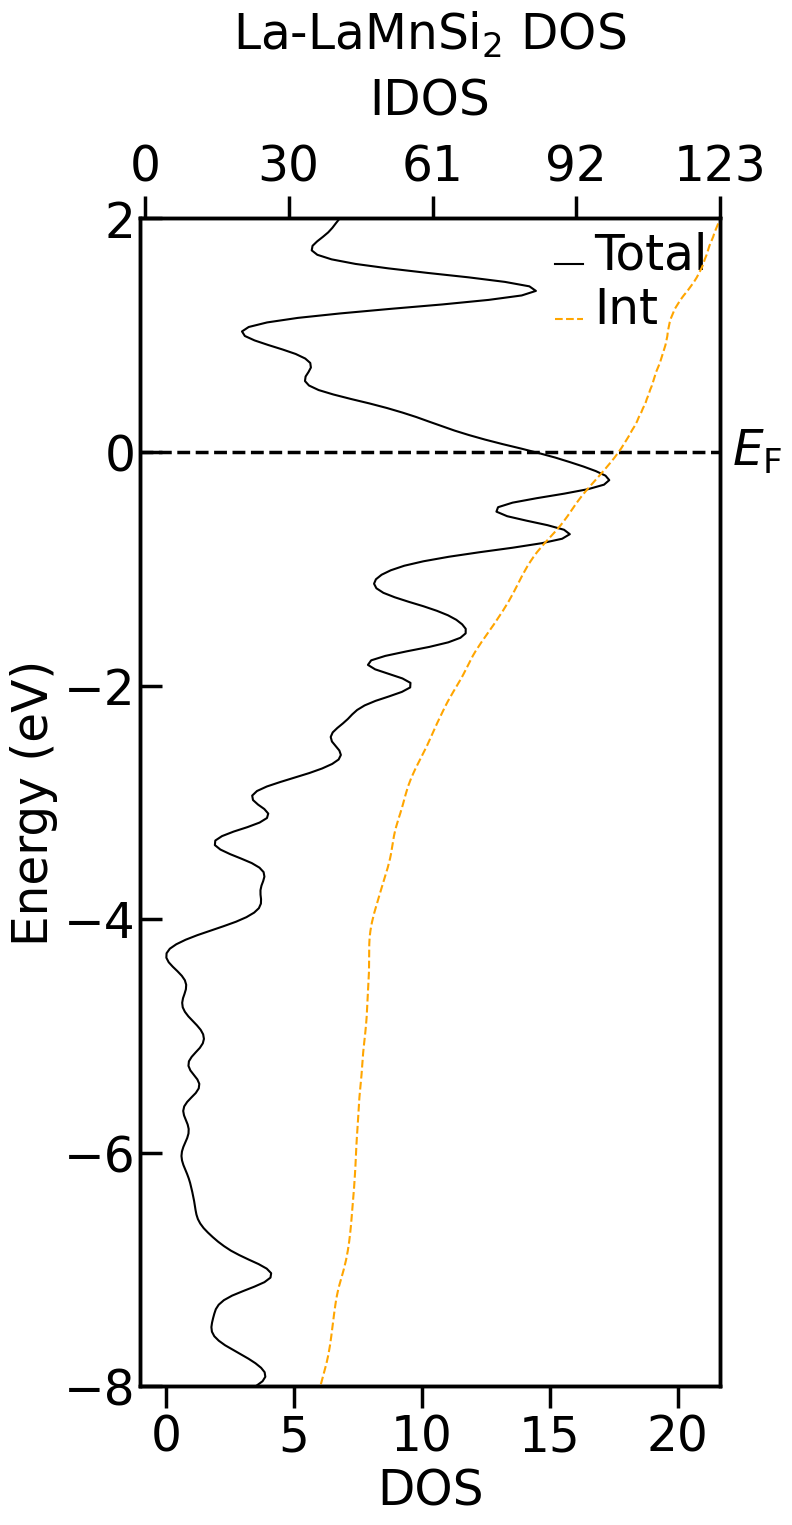

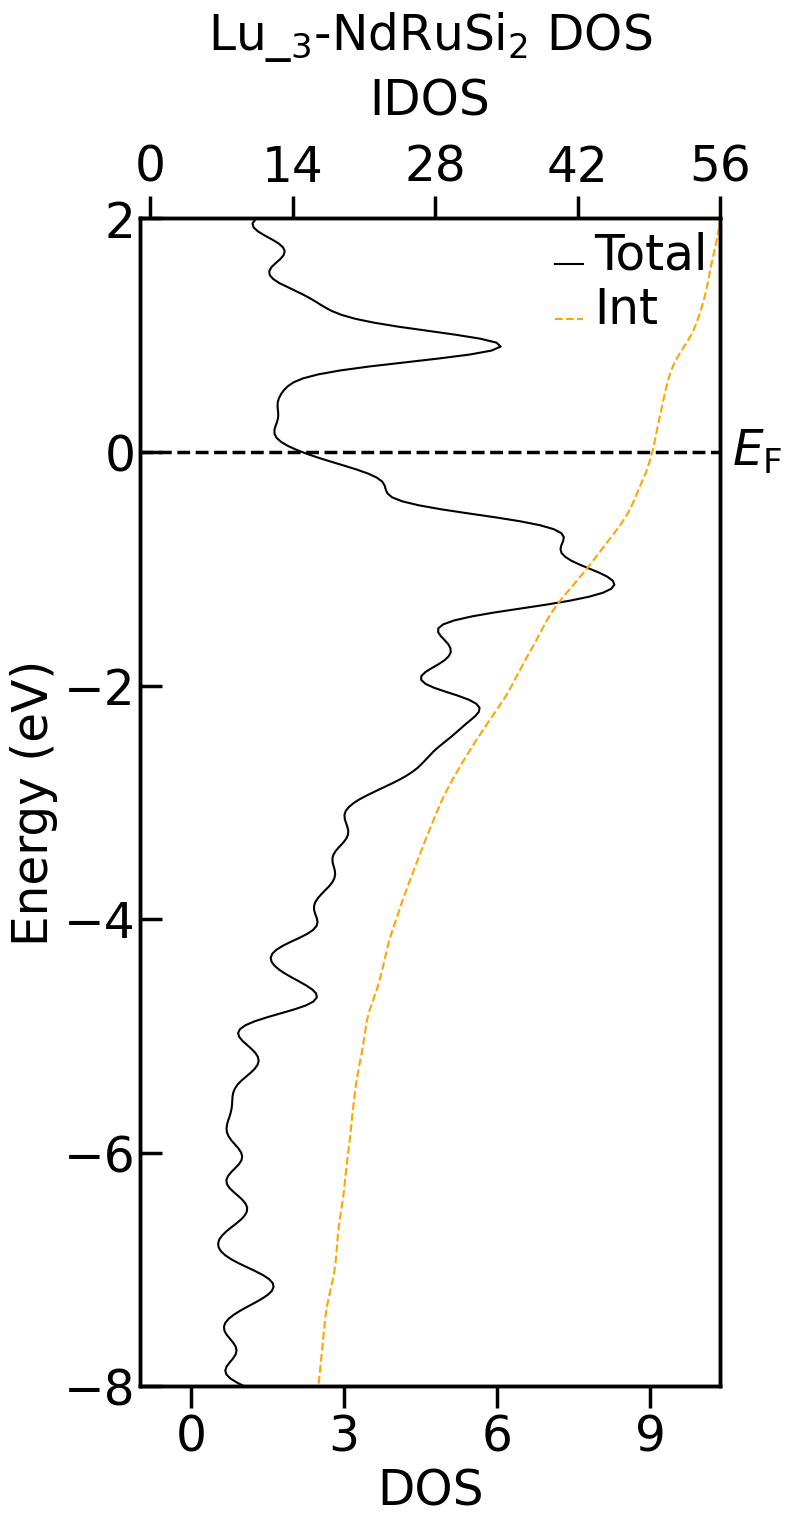

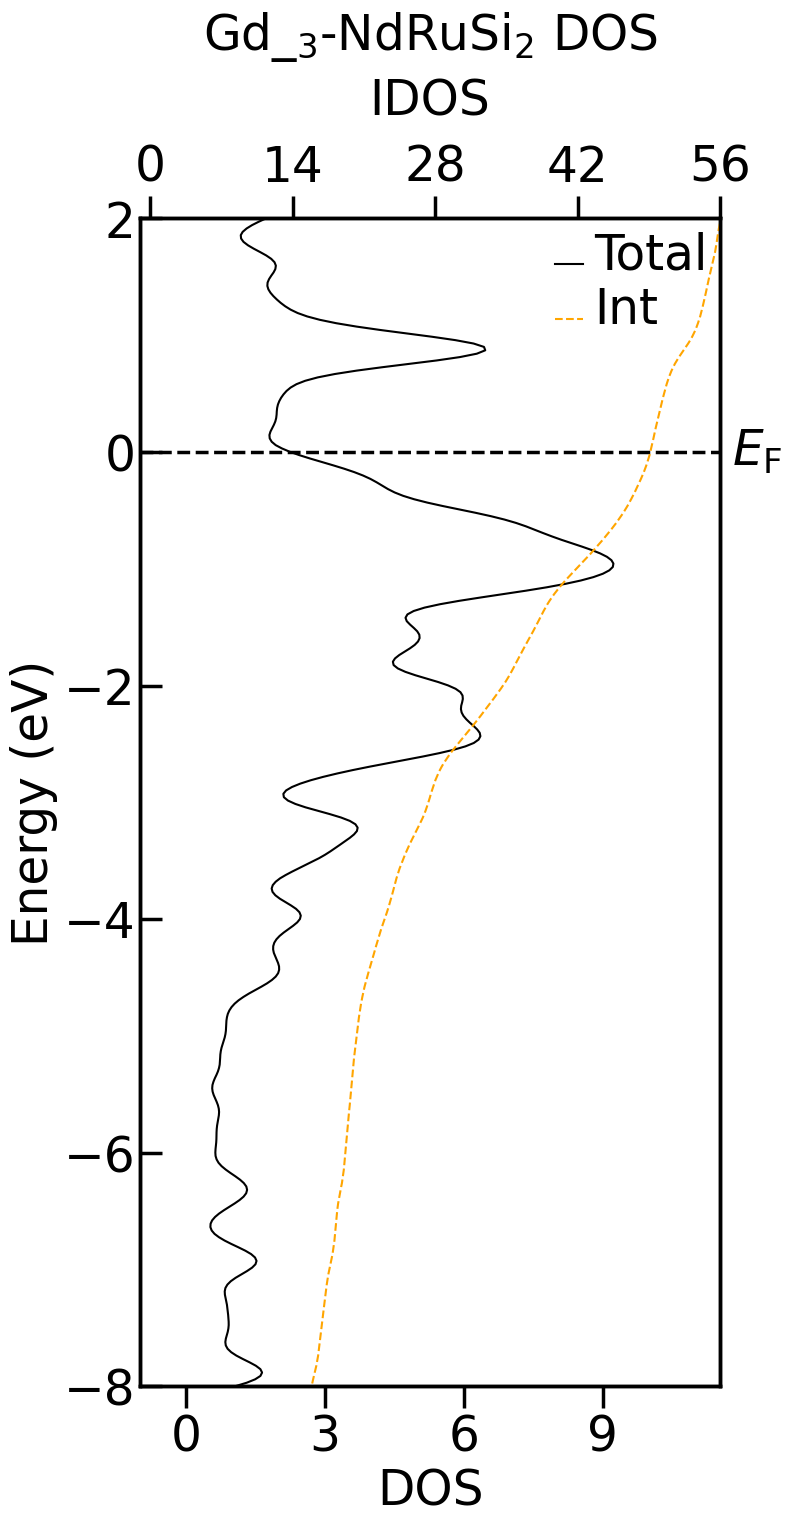

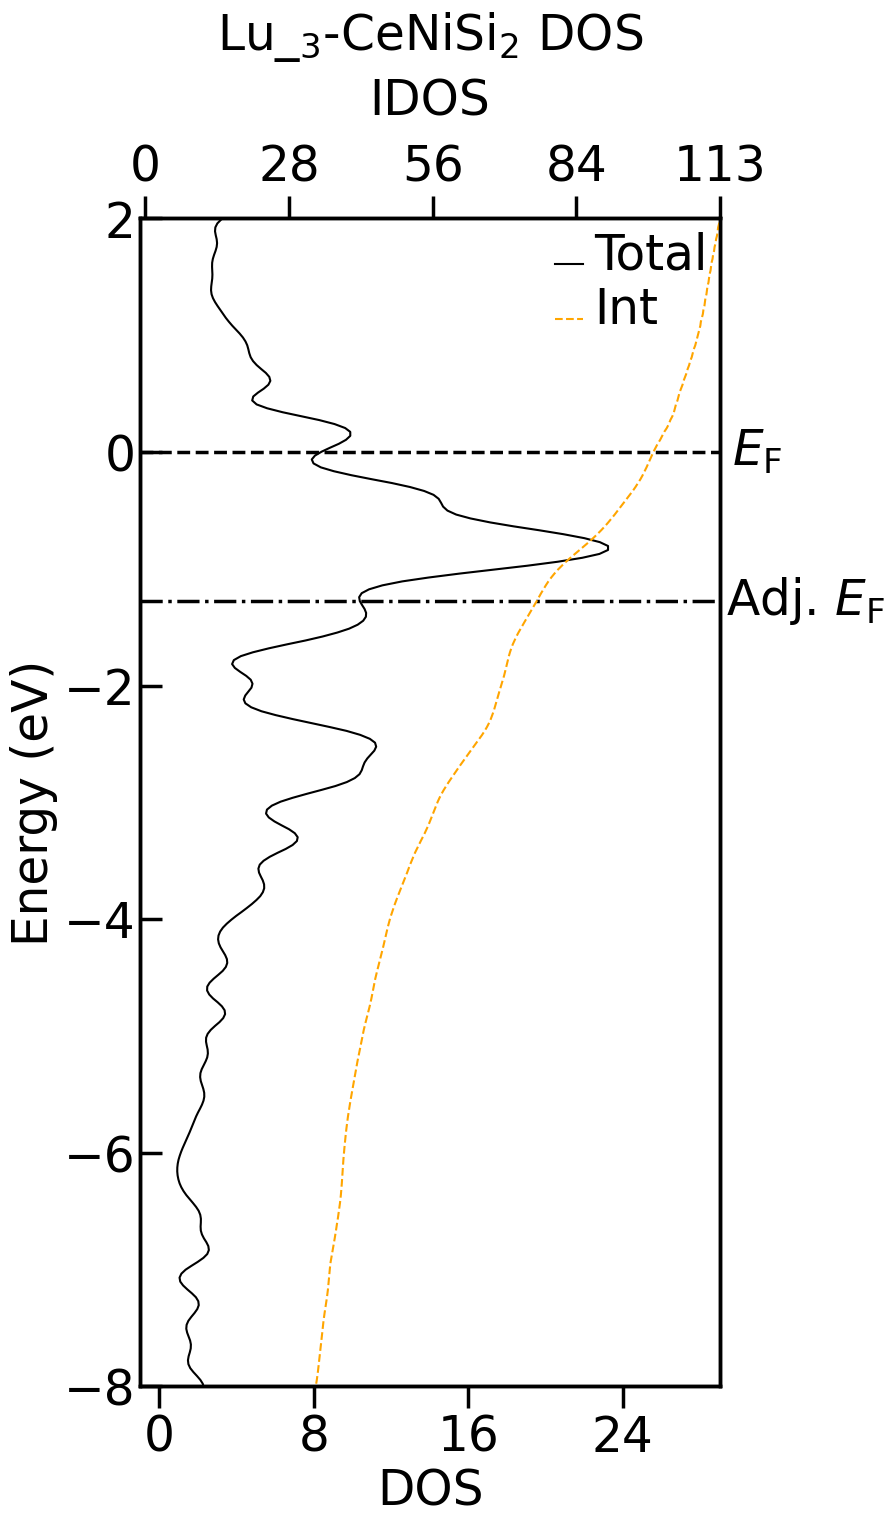

In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import glob
import re

# Dictionary containing parent folder labels and corresponding values for subtraction
subtraction_values = {
    "Ce-CeNiSi2": 8.40520303,
    "Ce-LaMnSi2": 8.50746363,
    "Ce-NdRuSi2": 8.46130003,
    "La-LaMnSi2": 8.04502225,
    "La-NdRuSi2": 8.56646371,
    "La-CeNiSi2": 8.41595414,
    "Gd_3-CeNiSi2": 6.74397222,
    "Gd_3-NdRuSi2": 6.70963108,
    "Gd_3-LaMnSi2": 6.74419403,
    "Lu_3-NdRuSi2": 6.74086725, 
    "Lu_3-LaMnSi2": 6.7692164,
    "Lu_3-CeNiSi2": 6.7650532,
}

def plot_Dos_contributions(directory):
    Dos_files = get_Dos_files(directory)
    fig, ax = plt.subplots(figsize=(10, 16))  # Adjusted figure size
    ax_int = ax.twiny()  # Secondary x-axis for Dos-Int scale
    
    plt.subplots_adjust(left=.22, top=.84, right=.8)  # Increase margins
    
    # Initialize lists to store handles and labels for legend
    handles = []
    labels = []
    
    y_min, y_max = -8, 2  # Default y-axis limits
    
    max_x_value_total_within_yframe = -np.inf  # Initialize max x-value for Total within y-frame
    max_x_value_int_within_yframe = -np.inf  # Initialize max x-value for Int within y-frame
    
    annotation_added = False  # Flag to track if annotation is added
    
    for i, filename in enumerate(Dos_files):
        # Check if filename contains '+'
        if 'Dos-Total' not in filename and 'Dos-Int' not in filename:
            continue  # Only plot total and int

        # Read data from file
        data = np.loadtxt(filename)
        
        # Split x and y values
        x = data[:, 0]
        y = data[:, 1]
        
        # Get file name without extension
        file_name = os.path.splitext(os.path.basename(filename))[0]
        
        # Get parent folder label
        parent_folder = os.path.basename(directory)
        
        # Multiply "Int" values by -1 - due to formatting of integration from wxDragon
        if 'Int' in file_name:
            y *= -1
        
        # Subtract corresponding value from y-values
        if parent_folder in subtraction_values:
            y -= subtraction_values[parent_folder]
        
        # Plot the data
        label = file_name.replace('Dos-', '')  # Remove 'Dos-' prefix from label
        
        # Assign colors and line styles based on element
        color = 'blue'  # Default color for most elements
        line_style = '-'  # Default line style
        if 'Total' in label:
            color = 'black'  # Total DOS in black
            line_style = '-'
            # Filter x-values based on y-frame
            x_filtered = x[(y >= y_min) & (y <= y_max)]
            if x_filtered.size > 0:
                max_x_value_total_within_yframe = max(max_x_value_total_within_yframe, max(x_filtered))
        elif 'Int' in label:
            label = 'Int'  # Change label to 'Int'
            color = 'orange'
            line_style = '--'  # Dashed line for "Int" DOS
            # Filter x-values based on y-frame
            x_filtered = x[(y >= y_min) & (y <= y_max)]
            if x_filtered.size > 0:
                max_x_value_int_within_yframe = max(max_x_value_int_within_yframe, max(x_filtered))
        
        # Plot the data
        if 'Int' in file_name:
            line, = ax_int.plot(x, y, label=label, color=color, linestyle=line_style)  # Store the handle
        else:
            line, = ax.plot(x, y, label=label, color=color, linestyle=line_style)  # Store the handle

        handles.append(line)  # Append handle to list
        labels.append(label)  # Append label to list
    
        # Additional conditions for horizontal lines and text annotations
        if not annotation_added:
            if parent_folder == "Gd_3-CeNiSi2":
                ax.axhline(-0.5645858, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -0.5645858, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black',
                        transform=ax.get_yaxis_transform())
                annotation_added = True
            elif parent_folder == "Lu_3-LaMnSi2":
                ax.axhline(-1.0402164, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -1.0402164, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black',
                        transform=ax.get_yaxis_transform())
                annotation_added = True
            elif parent_folder == "Lu_3-CeNiSi2":
                ax.axhline(-1.2770532, color='black', linestyle='-.', linewidth=2.5)
                ax.text(1.01, -1.2770532, 'Adj. $E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black',
                        transform=ax.get_yaxis_transform())
                annotation_added = True

    # Set x-axis limits for both axes
    ax.set_xlim(-1, max_x_value_total_within_yframe * 1.25)
    ax_int.set_xlim(-1, max_x_value_int_within_yframe * 1)

    # Use regular expression to find numbers and subscript them
    folder_name = os.path.basename(directory)
    folder_name_subscripted = re.sub(r'(\d+)', lambda x: r'$_\mathrm{' + x.group(0) + r'}$', folder_name)
    folder_name_subscripted = folder_name_subscripted.replace('DOS', 'Dos')  # Replace "DOS" with "Dos"
    
    ax.set_xlabel('DOS', fontsize=35)  # Set font size for x-axis label
    ax.set_ylabel('Energy (eV)', fontsize=35)  # Set font size for y-axis

    ax.set_title(folder_name_subscripted + ' DOS', fontsize=35, pad=20)  # Set font size for title and add padding

    ax.set_ylim(-8, 2)  # Set the y-axis limits for specific parent folders

    ax.xaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))  # Show only 6 whole numbers on x-axis
    ax.axhline(0, color='black', linestyle='--', linewidth=2.5)  # Set line width to 3.2 for dashed line
    ax.text(ax.get_xlim()[1] + 0.02 * (ax.get_xlim()[1] - ax.get_xlim()[0]), 0, r'$E_{\mathrm{F}}$', fontsize=35, va='center', ha='left', color='black')  # Set font size for annotation text and italicize 'E'

    # Set font size for legend
    legend = ax.legend(handles, labels, frameon=False)  # Remove legend frame
    for text in legend.get_texts():
        text.set_fontsize(35)

    # Customize y-axis tick marks
    ax.tick_params(axis='y', direction='in', length=16, width=2.5, colors='black', which='both', labelsize=35)  # Set font size for tick labels and thicker ticks

    # Customize x-axis tick marks and labels
    ax.tick_params(axis='x', which='both', bottom=True, top=False, labelbottom=True, labelsize=35, length=16, width=2.5)  # Set font size for tick labels and adjust width

    # Set axes lines width to 2.5
    for spine in ax.spines.values():
        spine.set_linewidth(2.5)

    # Duplicate y-axis limits and ticks for the secondary x-axis
    ax_int.set_xlim(ax.get_xlim())
    ax_int.set_xticks(np.linspace(0, max_x_value_int_within_yframe, 5))  # Set ticks based on interval
    ax_int.set_xticklabels([f'{int(i)}' for i in np.linspace(0, max_x_value_int_within_yframe, 5)], fontsize=35)  # Set font size for top x-axis tick labels

    # Set axes lines width to 2.5 for the secondary x-axis
    for spine in ax_int.spines.values():
        spine.set_linewidth(2.5)

    ax_int.set_xlabel('IDOS', fontsize=35, labelpad=20)  # Set x-axis label for secondary x-axis
    ax_int.tick_params(width=2.5, which='both', length=16)

    plt.show()

    # Save the plot as PNG based on folder name with a custom filename
    output_filename = os.path.join(os.path.expanduser('~'), 'Desktop/REFeSi2/Graphs/Element_Contributions/IDOS', folder_name + ".png")
    fig.savefig(output_filename)

def get_Dos_files(directory):
    # Use glob to find all files starting with "Dos-" in the specified directory
    Dos_files = glob.glob(os.path.join(directory, 'Dos-*'))
    # Filter out files containing '+'
    Dos_files.sort(key=lambda x: custom_order(os.path.basename(x)))
    return Dos_files

def custom_order(filename):
    # Define the custom order of Total, {RE: "Er", "Ce", "Eu", "Ho", "Pr", "Sm", "Dy", "Gd", "La", "Nd", "Tb"}, Fe, and Si
    order = {"Total": 0, "Int": 1, "Er": 2, "Ce": 2, "Eu": 2, "Ho": 2, "Pr": 2, "Sm": 2, "Dy": 2, "Gd": 2, "La": 2, "Nd": 2, "Tb": 2, "Lu": 2, "Fe": 3, "Si": 4}
    # Extract the label from the filename
    label = filename.replace('Dos-', '').split('_')[0]
    # Return the corresponding order value
    return order.get(label, 999)

if __name__ == "__main__":
    desktop_directory = os.path.expanduser("~/Desktop")
    structures_directory = os.path.join(desktop_directory, "REFeSi2")

    for folder in os.listdir(structures_directory):
        directory = os.path.join(structures_directory, folder)
        if os.path.isdir(directory) and folder != 'Graphs':
            plot_Dos_contributions(directory)
